In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns



# Data Upload

In [2]:
!wget -q 'https://drive.google.com/uc?export=download&id=1BNg5hvo4oAERZ2iwnKbcSBuQcvE-dBQc' -O 'recommended_items1.csv'
!wget -q 'https://drive.google.com/uc?export=download&id=10W-d-2-B_4hoWI_Sy0mka2aenaj6F010' -O 'recommended_items2.csv'


In [3]:
r_items1 = pd.read_csv('/content/recommended_items1.csv')
r_items2 = pd.read_csv('/content/recommended_items2.csv')


# Data Exploration and Analysis

In [4]:
r_items1

,user_id,recommended_item,predicted_rating
0,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B000CJA3YW,5.0
1,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K3APZ0,5.0
2,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K66ACO,5.0
3,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K72K3G,5.0
4,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K79RXC,5.0
...,...,...,...
591,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B09YPVVR11,4.1
592,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B0B28VNFB6,4.1
593,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B0BCGD9BCY,4.1
594,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B0BCKKMSRJ,4.1


In [5]:
r_items1.describe()

,predicted_rating
count,596.000000
mean,4.410067
std,0.213493
min,4.100000
25%,4.300000
50%,4.400000
75%,4.500000
max,5.000000


In [6]:
r_items1.shape

(596, 3)

In [7]:
r_items2

,user_id,recommended_item,predicted_rating
0,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B000CJA3YW,5.0
1,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K3APZ0,5.0
2,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K66ACO,5.0
3,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K72K3G,5.0
4,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K79RXC,5.0
...,...,...,...
2591,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B09TX93SDS,2.3
2592,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B0B2VMJ32Y,2.3
2593,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B001U8BJHO,2.2
2594,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B08JFT8BVW,2.2


In [8]:
r_items2.describe()

,predicted_rating
count,2596.000000
mean,4.005738
std,0.486570
min,2.200000
25%,3.700000
50%,4.032576
75%,4.300000
max,5.000000


In [9]:
r_items2.shape

(2596, 3)

Lets plot the Frequency vs the Ratings for both recommendations, to see how the predicted ratings are distributed


<Axes: title={'center': "First Approach's predicted ratings' Distrubtion"}, ylabel='Frequency'>

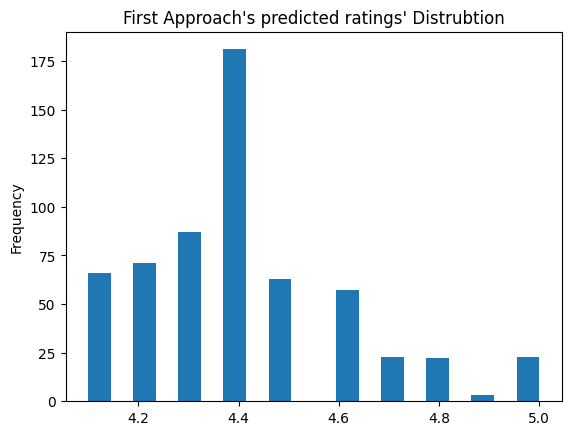

In [10]:
r_items1['predicted_rating'].plot(kind='hist', bins=20, title="First Approach's predicted ratings' Distrubtion")

<Axes: title={'center': "Second Approach's predicted ratings' Distrubtion"}, ylabel='Frequency'>

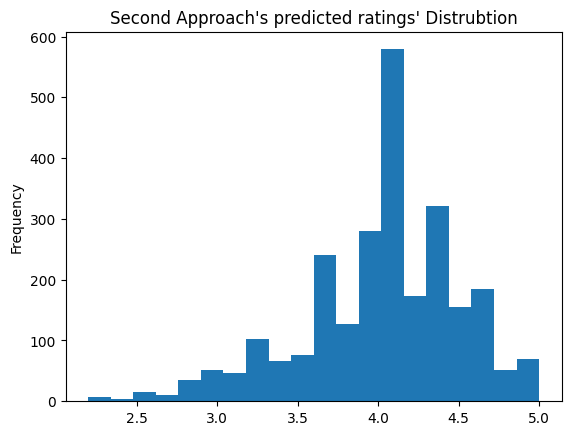

In [11]:
r_items2['predicted_rating'].plot(kind='hist', bins=20, title="Second Approach's predicted ratings' Distrubtion")


The second recommendation approach has more items recommended. Naturally that means the frequency vs rating distribution will be higher, with more items under different possible ratings.

## Similarity between Approach 1 and Approach 2

Now, let's investigate the similarity between the recommended items in the first approach vs the second approach

In [12]:
combined_pred_ratings = pd.concat([r_items1, r_items2], ignore_index=True)

In [13]:
combined_pred_ratings

,user_id,recommended_item,predicted_rating
0,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B000CJA3YW,5.0
1,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K3APZ0,5.0
2,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K66ACO,5.0
3,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K72K3G,5.0
4,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K79RXC,5.0
...,...,...,...
3187,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B09TX93SDS,2.3
3188,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B0B2VMJ32Y,2.3
3189,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B001U8BJHO,2.2
3190,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B08JFT8BVW,2.2


In [14]:
unique_items1 = set(r_items1['recommended_item'].unique())
unique_items2 = set(r_items2['recommended_item'].unique())

In [15]:
common_items = unique_items1.intersection(unique_items2)

In [16]:
print("Items common to both DataFrames:")
print(common_items)

Items common to both DataFrames:
{'B089KWBLBQ', 'B08DL9SL59', 'B08T6RBLFT', 'B08QVFJV89', 'B07B68DPMT', 'B0B1T5N8FV', 'B07KYW8K98', 'B08RXJJRF6', 'B09DR2QP9K', 'B09581T5Y1', 'B094XRZM8G', 'B08PG563FP', 'B08C1K6T7P', 'B08PBJ96FZ', 'B08MDFD6ZD', 'B08GJXJ7T5', 'B099DKYM3T', 'B0984VXB33', 'B002K72K3G', 'B08FK1KMWY', 'B087RGKJF6', 'B08K8J3X1X', 'B09ZZN9BPP', 'B082SJT4WN', 'B09C4SPQVR', 'B09TXDPY1S', 'B08ZHY6CDV', 'B002K75NTY', 'B07VP2KZ1K', 'B086WK5RH8', 'B07PM9L88R', 'B08WNL5KZ7', 'B0896WWK9P', 'B088T9MNF2', 'B09FPN2H9F', 'B08P6ZVWHX', 'B09MLQ975D', 'B08TRHYKR3', 'B08HJCVHRR', 'B09DPS498Z', 'B087CH6NBX', 'B0BPBNG5RF', 'B08F2D5BYT', 'B07JPZ6XVR', 'B08L1FR54J', 'B0B92TVVL3', 'B0B28VNFB6', 'B004C7MTLA', 'B09C15R7GS', 'B08ZM2GP1X', 'B08DXHVGGJ', 'B09B2VKQH5', 'B07Y32DLKL', 'B084L16CWP', 'B09X57HM1M', 'B095397QSG', 'B08BHL18M5', 'B0BJ2JCSCX', 'B095Y8ZGKL', 'B002K79RXC', 'B096QK3JQW', 'B08R9SVG1D', 'B08GQCY1YP', 'B08QDVJKP8', 'B07QXVGS71', 'B08SVZVLMX', 'B002K3APZ0', 'B08172R5QB', 'B0B6217LNT', 

In [17]:
len(common_items)

596

There is a total of 596 recommended items that are common between both approaches.

In [18]:
unique_items_only_in_1 = unique_items1 - common_items
unique_items_only_in_2 = unique_items2 - common_items

In [19]:
print("\nItems unique to r_items1:")
print(unique_items_only_in_1)


Items unique to r_items1:
set()


The number of unique items in the second approach when compared to the common items is zero. This means that ALL items that have been recommended by approach 1 are also recommended by approach 2.

In [20]:
print("\nItems unique to r_items2:")
print(unique_items_only_in_2)


Items unique to r_items2:
{'B07RB517P7', 'B07MFTJ1PJ', 'B08JZ5TNGV', 'B09CSFSJDT', 'B07QLRQFWW', 'B09HJYTSWX', 'B0BDY1KZ98', 'B07Y8D9F5P', 'B074WCWFCQ', 'B07ML59JKS', 'B08CVFPCCG', 'B077KFVJDP', 'B0BJQ4XVCR', 'B08FHR7L23', 'B01449GAII', 'B01EYDKLDO', 'B07J3Q6KHQ', 'B0B9T8XK9Y', 'B00UF65ALI', 'B0872RW5DZ', 'B07SBKR2WY', 'B08S6P9MFW', 'B015FN5FWE', 'B000AJGP1E', 'B095BZ1VKN', 'B000OUY4T4', 'B008AXTKZK', 'B071ZGRYN3', 'B07VCHQCMM', 'B09G93C6XC', 'B0B2VMJ32Y', 'B07FWCQZ6D', 'B09MJGCT4Y', 'B0BTYSML8S', 'B00UF6NHYA', 'B08VJ2P7RM', 'B09F2QQ3Z5', 'B07RF9K6MR', 'B0711R1NMR', 'B09PXVKWBN', 'B096P8BHLY', 'B01H7TALU0', 'B0BKGJCHRY', 'B08HFSKWC3', 'B07Y339HBH', 'B092SS684W', 'B09FPL7GG8', 'B08K2MYBZY', 'B072PS4YVK', 'B00310GKBE', 'B08LH1H437', 'B00IVMLYR2', 'B086YJSK15', 'B09F34XHQ2', 'B07X4JVN68', 'B01JFW7A7O', 'B08Q34FLJB', 'B089LL5MMZ', 'B09MHYJLNB', 'B016XPOWG8', 'B079MBVGZ1', 'B08FYDGD9D', 'B06ZZRQHLT', 'B00CBYTBTY', 'B08BFQ1PT8', 'B00QJQUOPK', 'B083928P4H', 'B08SMD2L1L', 'B07F2PY8QQ', 'B0932

In [21]:
print(len(unique_items_only_in_2))


2000


Approach two contains both the recommended items present in approach 1 and other items, giving it a total of 2000 unique recommended items

## Rating Difference

Another thing we wanted to explore is if there's any rating difference between both approaches for the items we found in common. How exactly does changing the number of user and the number of ratings in our analysis affect the predicted ratings?

In [22]:
merged_df = pd.merge(r_items1[r_items1['recommended_item'].isin(common_items)], r_items2[r_items2['recommended_item'].isin(common_items)], on='recommended_item')
merged_df['rating_diff'] = merged_df['predicted_rating_x'] - merged_df['predicted_rating_y']
merged_df.head()


,user_id_x,recommended_item,predicted_rating_x,user_id_y,predicted_rating_y,rating_diff
0,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B000CJA3YW,5.0,AEAXAJACFMXIAAH4WOHRMXPSZWFA,5.0,0.0
1,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K3APZ0,5.0,AEAXAJACFMXIAAH4WOHRMXPSZWFA,5.0,0.0
2,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K66ACO,5.0,AEAXAJACFMXIAAH4WOHRMXPSZWFA,5.0,0.0
3,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K72K3G,5.0,AEAXAJACFMXIAAH4WOHRMXPSZWFA,5.0,0.0
4,AEAXAJACFMXIAAH4WOHRMXPSZWFA,B002K79RXC,5.0,AEAXAJACFMXIAAH4WOHRMXPSZWFA,5.0,0.0


Visualizing the rating difference using a sccatter plot

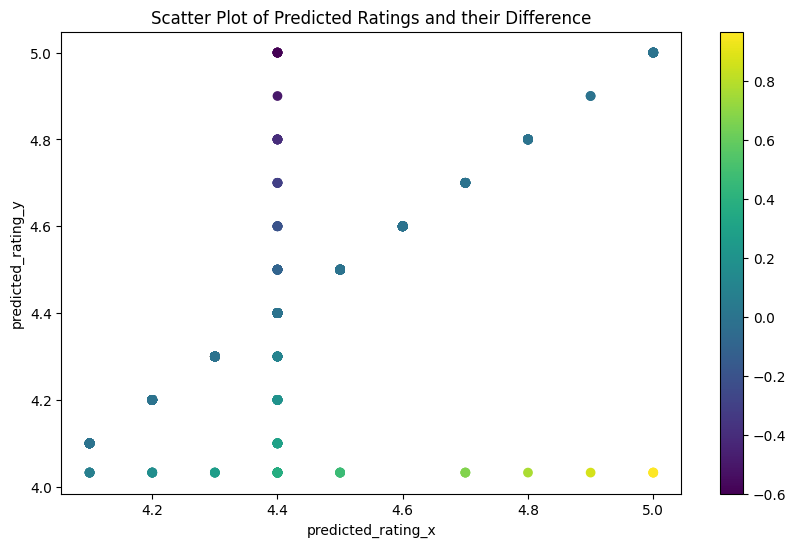

In [23]:
plt.figure(figsize=(10, 6))

plt.scatter(merged_df['predicted_rating_x'], merged_df['predicted_rating_y'], c=merged_df['rating_diff'], cmap='viridis')
plt.xlabel('predicted_rating_x')
plt.ylabel('predicted_rating_y')
plt.title('Scatter Plot of Predicted Ratings and their Difference')
plt.colorbar()
plt.show()


 Yellow and red points represent larger differences, while blue points represent smaller differences. This allows for a quick and intuitive understanding of the distribution of rating differences across the recommended items.


The scatter plot allows us to deduce the following:
1. **Comprehensive Agreement:** The overall rising trend of the data points indicates a general favorable connection between the anticipated ratings from both models.

2. **Differences in Ratings:** Nonetheless, there exist certain noteworthy distinctions in the anticipated ratings between the two models. The color gradient serves as a representation of these disparities, with blue points denoting smaller variances and yellow and red points showing larger differences.

3. **Anomalies:** A small number of data points deviate markedly from the primary trend.


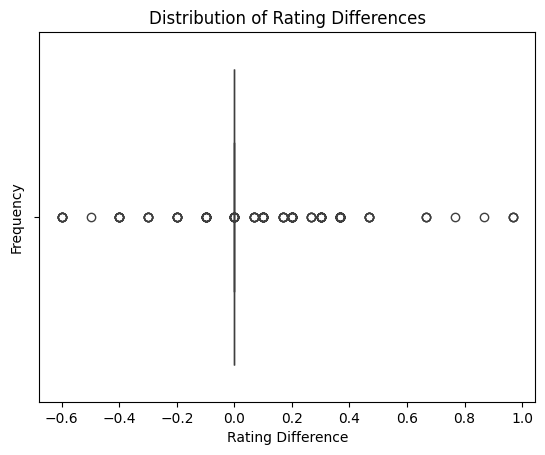

In [24]:
merged_df['rating_diff'] = merged_df['predicted_rating_x'] - merged_df['predicted_rating_y']
sns.boxplot(x="rating_diff", data=merged_df)
plt.xlabel('Rating Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Differences')
plt.show()


A negative rating difference means that the first approach's predicted rating is lower than the second approach's predicted rating for the same item. While a positive rating difference means the first's approach predicted rating is higher than the second's approach predicted rating for the same item.

Based on the number of plots found in the second part of the data, we can assume that on average, the first approach had a higher rating for the same items than the second approach

**List of items that have a rating difference higher than 0.5 and less than -0.5, or the items with the largest rating difference**


In [25]:
large_rating_difference_items = merged_df[(merged_df['rating_diff'] < -0.5) | (merged_df['rating_diff'] > 0.5)]['recommended_item']
print(large_rating_difference_items)


9      B002T9HG4S
11     B01CHDL5T2
22     B0B92TVVL3
25     B094QXL3BT
40     B092YLDNW8
49     B01AI1I9IU
55     B086PKVTYN
62     B0937C6WY5
194    B002TDPBNC
237    B07XJGGJ5G
238    B07XJYMH6C
317    B093BTCXY4
334    B0989M9D83
335    B098R9JYP8
Name: recommended_item, dtype: object


In [26]:
len(large_rating_difference_items)


14

[link text](https://)only 14 items had really large rating differences.

In [27]:

df_large_rating_difference_items = merged_df[merged_df['recommended_item'].isin(large_rating_difference_items)]


Plotting the rating values for both approaches for the 14 large rating differences items


In [28]:

df_large_rating_difference_items[['recommended_item', 'predicted_rating_x', 'predicted_rating_y', 'rating_diff']]


,recommended_item,predicted_rating_x,predicted_rating_y,rating_diff
9,B002T9HG4S,5.0,4.032576,0.967424
11,B01CHDL5T2,5.0,4.032576,0.967424
22,B0B92TVVL3,5.0,4.032576,0.967424
25,B094QXL3BT,4.9,4.032576,0.867424
40,B092YLDNW8,4.8,4.032576,0.767424
49,B01AI1I9IU,4.7,4.032576,0.667424
55,B086PKVTYN,4.7,4.032576,0.667424
62,B0937C6WY5,4.7,4.032576,0.667424
194,B002TDPBNC,4.4,5.000000,-0.600000
237,B07XJGGJ5G,4.4,5.000000,-0.600000


## MAE and Correlation Coefficient

One way to measure the performance of both models is to calculate the Mean absolute error (MAE) and the correlation coefficient.

**MAE**: measure of errors between paired observations expressing the same phenomenon.

**Correlation Coefficient**: is a numerical measure of some type of linear correlation, meaning a statistical relationship between two variables.

In [29]:
mae = mean_absolute_error(merged_df['predicted_rating_x'], merged_df['predicted_rating_y'])
percentage_mae = mae / 5 * 100
print("Mean absolute error:", mae)
print("Mean absolute error as a percentage:", percentage_mae, "%")


Mean absolute error: 0.06768610197358052
Mean absolute error as a percentage: 1.3537220394716105 %


The error between both models has been measured to be 1.35%, an error that can be ignored when dealing with larger datasets. However, this error specifically is for reduced data, how it varies if measured between the reduced data and raw data is something we plan to explore in future project improvements.


Correlation coefficient: 0.761274060428598


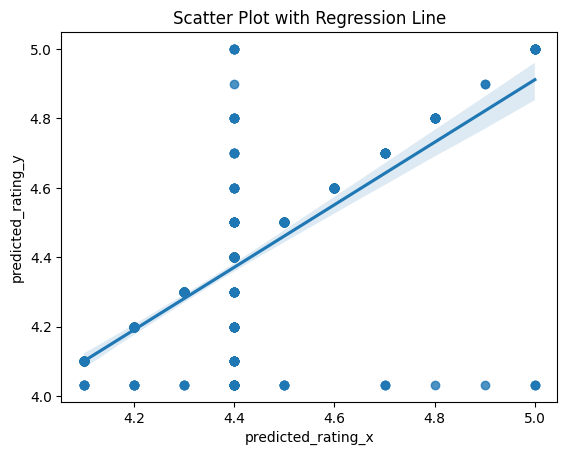

In [30]:

corr_coef = merged_df['predicted_rating_x'].corr(merged_df['predicted_rating_y'])
print("Correlation coefficient:", corr_coef)

sns.regplot(x="predicted_rating_x", y="predicted_rating_y", data=merged_df)
plt.xlabel('predicted_rating_x')
plt.ylabel('predicted_rating_y')
plt.title('Scatter Plot with Regression Line')
plt.show()


A positive correlation coefficient implies a direct linear link: when one method's rating rises, so does the other's; conversely for a negative coefficient. The coefficient's magnitude signifies the strength of this association: 1 denotes a perfect positive linear relationship, 0 implies no linear link, and -1 indicates a perfect negative linear relationship. In this instance, a correlation coefficient of 0.9021 indicates a robust positive linear relationship, suggesting concurrence between the predicted ratings of both approaches for identical items.





